In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
# Load the datasets
normal_logs = pd.read_csv('system_activity_log.csv')
breach_logs = pd.read_csv('system_activity_log1.csv')

In [32]:
# Combine both datasets into one
combined_logs = pd.concat([normal_logs, breach_logs], ignore_index=True)

In [33]:
# Create a label column 
combined_logs['Label'] = 0
combined_logs.loc[combined_logs['Event'] == 'Security Breach', 'Label'] = 1

In [34]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(combined_logs['Path'].values.astype('U'))


In [35]:
# Split the data into training and testing sets
train_data = X[:len(normal_logs)]
test_data = X[len(normal_logs):]

In [36]:
# Create labels for training and testing data
train_labels = combined_logs['Label'][:len(normal_logs)]
test_labels = combined_logs['Label'][len(normal_logs):]


In [37]:
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(train_data, train_labels)

MultinomialNB()

In [38]:
# Predict on the test data
predictions = classifier.predict(test_data)

In [39]:
# Generate a confusion matrix and classification report
conf_matrix = confusion_matrix(test_labels, predictions)
class_report = classification_report(test_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[942   0]
 [104   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       942
           1       0.00      0.00      0.00       104

    accuracy                           0.90      1046
   macro avg       0.45      0.50      0.47      1046
weighted avg       0.81      0.90      0.85      1046



C:\Users\vdgon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\vdgon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\vdgon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [40]:
# Calculate and visualize the number of security breaches
num_breaches = sum(test_labels)
print(f"Number of security breaches detected: {num_breaches}")

Number of security breaches detected: 104


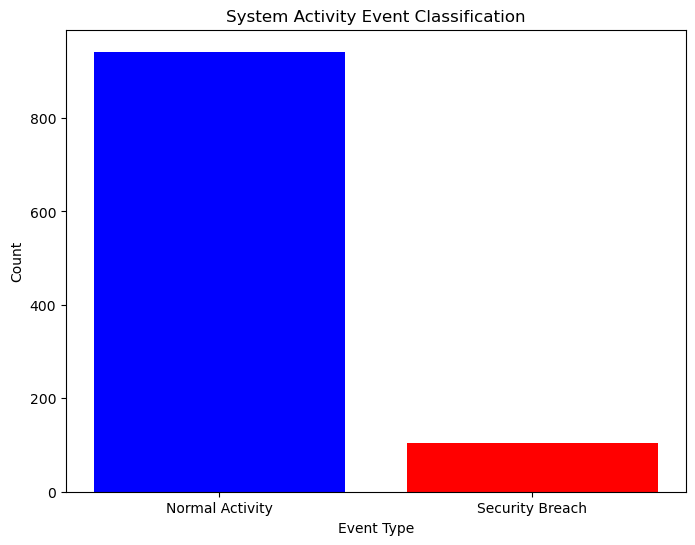

In [41]:
# Create a bar chart to visualize the results
labels = ['Normal Activity', 'Security Breach']
values = [len(test_labels) - num_breaches, num_breaches]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('System Activity Event Classification')
plt.show()

In [44]:
# Count the occurrences of each event type
event_counts = combined_logs['Event'].value_counts().reset_index()
event_counts.columns = ['Event', 'Count']

# Create a bar chart using Plotly
fig = px.bar(event_counts, x='Event', y='Count', color='Event', title='System Activity Event Counts')
fig.update_xaxes(tickangle=45)
fig.show()